In [ ]:
print("\nGrupa: 2242 sg1")


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import random
from google.colab.patches import cv2_imshow
video_filename = "videoclipmasini.mp4"

# Deschide videoclipul
video = cv2.VideoCapture(video_filename)

# Verifică deschiderea corectă a fișierului video
if not video.isOpened():
    print(f"Eroare: Fișierul {video_filename} nu s-a deschis corect.")
    exit()

# Obține informații despre videoclip (FPS, număr de cadre etc.)
fps = video.get(cv2.CAP_PROP_FPS)
numar_cadre = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
numar_cadre_selectate = 20
interval = int(numar_cadre / numar_cadre_selectate)

cadre_selectate = []

# Extrage cadrele din videoclip
for i in range(0, numar_cadre, interval):
    video.set(cv2.CAP_PROP_POS_FRAMES, i)
    ret, cadru = video.read()

    if not ret:
        print("Eroare: Nu am putut citi cadru.")
        continue

    if cadru is None:
        print("Eroare: Formatul cadrului nu este acceptat.")
        continue

    cadre_selectate.append(cadru)

if not cadre_selectate:
    print("Eroare: Nu am găsit niciun cadru valid.")
else:
    print("Cadre extrase cu succes")

Cadre extrase cu succes


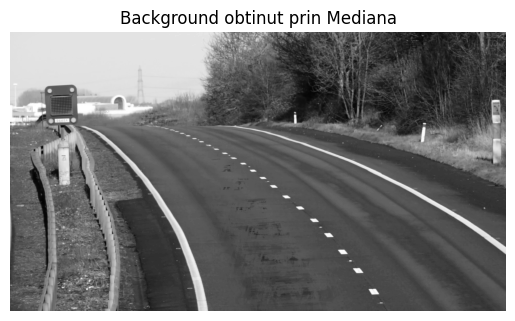

In [10]:
# Calculul primului fundal prin metoda medianei
bg_median = np.median(cadre_selectate, axis=0).astype(dtype=np.uint8)
bg_median_gray = cv2.cvtColor(bg_median, cv2.COLOR_BGR2GRAY)

# Afișează imaginea estimată folosind metoda medianei
plt.imshow(bg_median_gray, cmap='gray')  # Specify the colormap for grayscale image
plt.axis('off')
plt.title('Background obtinut prin Mediana')
plt.show()

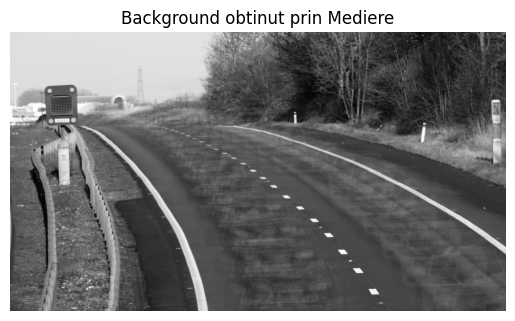

In [11]:
# Calculul celui de-al doilea fundal prin metoda medierii
bg_mediere = np.mean(cadre_selectate, axis=0).astype(np.uint8)
bg_mediere_gray = cv2.cvtColor(bg_mediere, cv2.COLOR_BGR2GRAY)

# Afișează imaginea estimată folosind metoda medierii
plt.imshow(bg_mediere_gray, cmap='gray')
plt.axis('off')
plt.title('Background obtinut prin Mediere')
plt.show()

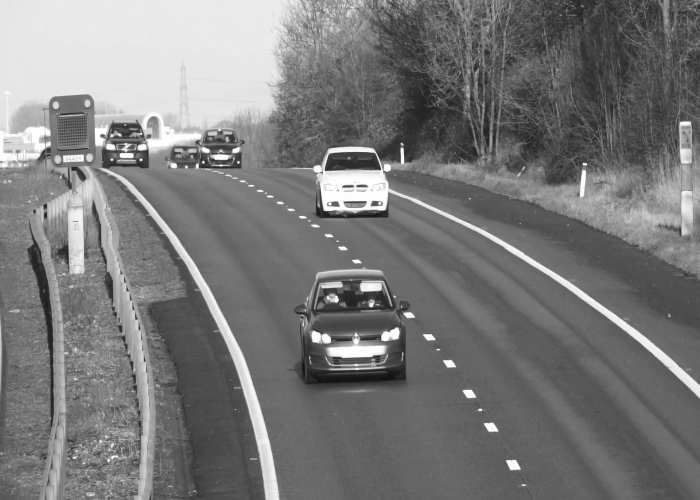

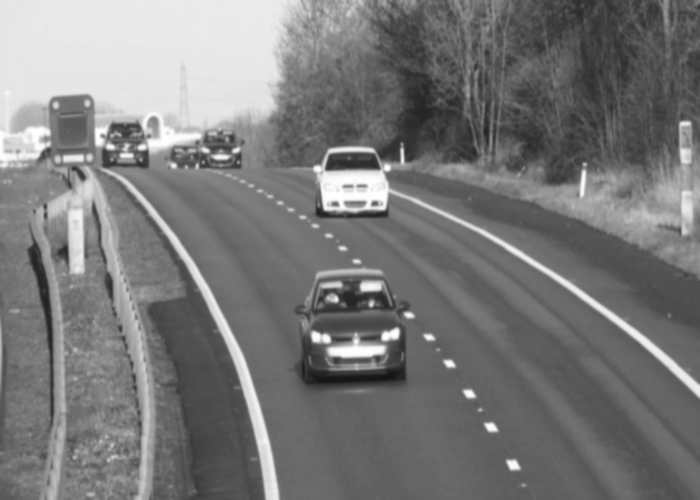

In [12]:
video_filename = "videoclipmasini.mp4"
video = cv2.VideoCapture(video_filename)

if not video.isOpened():
    print(f"Eroare: Fișierul {video_filename} nu s-a deschis corect.")
    exit()

# Alegem un cadru aleatoriu
numar_cadre = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
random_frame_idx = random.randint(0, numar_cadre - 1)
video.set(cv2.CAP_PROP_POS_FRAMES, random_frame_idx)

ret, frame = video.read()
if not ret:
    print("Eroare: Nu am putut citi cadru.")
    exit()
# Convertim în grayscale și aplicăm filtrul Gaussian
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blurred_frame = cv2.GaussianBlur(frame_gray, (15, 15), 0)
width = 700
height = 500
frame_gray_resized = cv2.resize(frame_gray, (width, height))
blurred_frame_resized = cv2.resize(blurred_frame, (width, height))

cv2_imshow(frame_gray_resized)
cv2_imshow(blurred_frame_resized)


In [13]:
import cv2
import numpy as np

video_filename = "videoclipmasini.mp4"
video = cv2.VideoCapture(video_filename)

if not video.isOpened():
    print(f"Eroare: Fișierul {video_filename} nu s-a deschis corect.")
    exit()

fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_video_mediana = cv2.VideoWriter("/content/video_dif_mediana.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))
output_video_mediana_adaptive = cv2.VideoWriter("/content/video_dif_mediana_adaptive.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))
output_video_mediana_otsu = cv2.VideoWriter("/content/video_dif_mediana_otsu.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

video.set(cv2.CAP_PROP_POS_FRAMES, 0)

while True:
    ret, frame = video.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Calculează diferența mediană
    diff_mediana = cv2.absdiff(frame_gray, bg_median_gray)

    # Aplică filtrul Gaussian pentru diferența mediană
    blurred_diff = cv2.GaussianBlur(diff_mediana, (5, 5), 0)

    # Thresholding cu valoarea fixă
    _, binary_mask_mediana = cv2.threshold(blurred_diff, 50, 255, cv2.THRESH_BINARY)
    output_video_mediana.write(cv2.cvtColor(binary_mask_mediana, cv2.COLOR_GRAY2BGR))

    # Thresholding adaptiv
    adaptive_thresh = cv2.adaptiveThreshold(blurred_diff, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, -15)
    output_video_mediana_adaptive.write(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2BGR))

    # Aplică filtrul Gaussian înainte de Otsu
    _, binary_mask_otsu = cv2.threshold(blurred_diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    output_video_mediana_otsu.write(cv2.cvtColor(binary_mask_otsu, cv2.COLOR_GRAY2BGR))

# Eliberare resurse și închidere ferestre
video.release()
output_video_mediana.release()
output_video_mediana_adaptive.release()
output_video_mediana_otsu.release()
cv2.destroyAllWindows()


In [14]:
import cv2
import numpy as np

video_filename = "videoclipmasini.mp4"
video = cv2.VideoCapture(video_filename)

if not video.isOpened():
    print(f"Eroare: Fișierul {video_filename} nu s-a deschis corect.")
    exit()

fps = video.get(cv2.CAP_PROP_FPS)
width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

output_video_mediere = cv2.VideoWriter("/content/video_dif_mediere.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))
output_video_mediere_adaptive = cv2.VideoWriter("/content/video_dif_mediere_adaptive.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))
output_video_mediere_otsu = cv2.VideoWriter("/content/video_dif_mediere_otsu.mp4", cv2.VideoWriter_fourcc(*"mp4v"), fps, (width, height))

video.set(cv2.CAP_PROP_POS_FRAMES, 0)

while True:
    ret, frame = video.read()
    if not ret:
        break

    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    diff_mediere = cv2.absdiff(frame_gray, bg_mediere_gray)

    # Thresholding cu valoarea fixă
    _, binary_mask_mediere = cv2.threshold(diff_mediere, 50, 255, cv2.THRESH_BINARY)
    output_video_mediere.write(cv2.cvtColor(binary_mask_mediere, cv2.COLOR_GRAY2BGR))

    # Thresholding adaptiv
    adaptive_thresh = cv2.adaptiveThreshold(diff_mediere, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 25, -15)
    output_video_mediere_adaptive.write(cv2.cvtColor(adaptive_thresh, cv2.COLOR_GRAY2BGR))

    # Aplică filtrul Gaussian înainte de Otsu
    blurred_diff = cv2.GaussianBlur(diff_mediere, (5, 5), 0)
    _, binary_mask_otsu = cv2.threshold(blurred_diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    output_video_mediere_otsu.write(cv2.cvtColor(binary_mask_otsu, cv2.COLOR_GRAY2BGR))

# Eliberare resurse și închidere ferestre
video.release()
output_video_mediere.release()
output_video_mediere_adaptive.release()
output_video_mediere_otsu.release()
cv2.destroyAllWindows()
